# 104人力銀行網站爬蟲練習
## 從104人力銀行網站爬取求職公司資訊。

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 首先進入104人力銀行網站：https://www.104.com.tw/cust/list/index/
### 在"地區"及"產業"下拉式選單中，選擇你希望的選項，然後按下"找公司"按鈕。

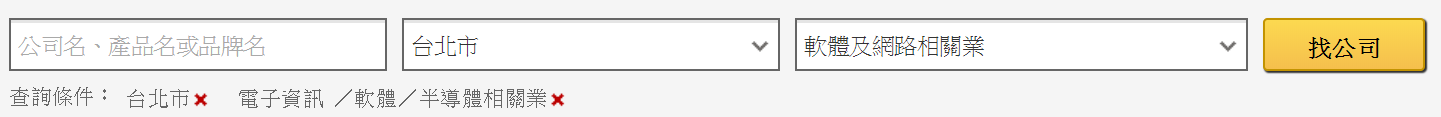

### 開啟新網頁後，觀察新的網址內容，把網址複製下來。

In [2]:
job_104_url = "https://www.104.com.tw/cust/list/index/?page=1&order=1&mode=s&jobsource=checkc&area=6001001000&indcat=1001002000"

### 開始爬取搜尋結果

In [3]:
browser = webdriver.Chrome()
browser.get(job_104_url)  # 打開瀏覽器並連到網頁
time.sleep(2)  # delay一段時間等待網頁更新完成

result = []

while True:
    time.sleep(3)  # delay一段時間等待網頁更新完成
    html = browser.page_source
    soup = BeautifulSoup(html, 'lxml')
    current_page = soup.find("a", attrs={'class':"page-num active"})['data-value']
    total_page = soup.find("div", attrs={'class':"page-total"})['data-total']
    print('現在正在載入第{}頁/共{}頁'.format(current_page, total_page))
    company_list = soup.find("div", attrs={'id':"company-result"}).find_all("article", attrs={'class':"items"})
    result.append(company_list)
    #print(result)
    print('資料載入中...')
    
    #
    # 擷取公司名稱及簡介內容
    #
    for company in company_list:
        # 因為內容太多，我們把爬取到的結果，寫入"company_list.txt"檔案中，稍後再來檢視
        company_name = company.a.string
        f = open("D:\web crawler\company_list.txt", "a+", encoding='utf-8')
        f.write( company_name + "\n" )  # 寫入公司名稱
        
        company_desc = company.find("p", attrs={'class':"desc"})
        f.write( company_desc.string + "\n" )  # 寫入公司簡介
        f.write( "--------------------------------------------------------------------------------" + "\n" )
        f.close()

    '''
    
    接下來請學員練習，定位到「下一頁」按鈕。(可以利用find_element_by_link_text("xxx")的函式)
    如果還有下一頁，利用Selenium模擬click「下一頁」按鈕的動作。(定位到物件後，利用其click()屬性)
    若沒有下一頁了，離開爬取的流程
    
    Your code here
    
    '''
    if total_page == current_page:
        print('========沒有下一頁了========')
        break
    else:
        print('切換下一頁中...')
        browser.find_element_by_link_text("下一頁").click()
        continue

# 關閉瀏覽器
browser.quit();

現在正在載入第1頁/共7頁
資料載入中...
切換下一頁中...
現在正在載入第2頁/共7頁
資料載入中...
切換下一頁中...
現在正在載入第3頁/共7頁
資料載入中...
切換下一頁中...
現在正在載入第4頁/共7頁
資料載入中...
切換下一頁中...
現在正在載入第5頁/共7頁
資料載入中...
切換下一頁中...
現在正在載入第6頁/共7頁
資料載入中...
切換下一頁中...
現在正在載入第7頁/共7頁
資料載入中...
========沒有下一頁了========


In [9]:
for i in result:
    print(i)

[<article class="items">
<div class="info">
<h1>
<a href="https://www.104.com.tw/company/1a2x6bj7lq?jobsource=checkc" target="_blank" title="&lt;桔豐科技股份有限公司&gt;">桔豐科技股份有限公司</a>
</h1>
<p class="data">
<span>台北市松山區</span>，<span>其他電信及通訊相關業</span>
</p>
<p class="data">
<span>資本額：1億</span>，<span>員工人數：65人</span>
</p>
<p class="desc">桔豐科技2019年正式邁入5週年，以「立足台灣，放眼世界」立下公司營運主軸。展望未來，一直走在WIFI設備產業最前端的桔豐科技，不以提供WIFI設備租賃服務自我設限，而以WIFI產業最上層關鍵角色自我定位，面對未來本公司將朝「F.I....</p>
<div class="jobs">
<a href="https://www.104.com.tw/company/1a2x6bj7lq?jobsource=checkc#info06" target="_blank">工作機會 (1)</a>
</div>
</div>
<div class="action">
<img alt="" class="logo" src="https://static.104.com.tw/b_profile/6/130000000057406/logo.gif?v=20190722164440"/>
<button class="button act-save" data-custno="1a2x6bj7lq" data-gtm="正常儲存公司" title="儲存公司" type="button">
<i class="jbi-s18-star-dark"></i> 儲存公司                </button>
<button class="button act-notice" data-custno="1a2x6bj7lq" data-gtm="正常新工作通知" title="新工作通知" type="button">
<